## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('insurance.csv')
raw_data.head()
#Here, our objective is to predict the cost an individual might be charged given a set of inputs.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing

In [3]:
raw_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Exploring the PDFs

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

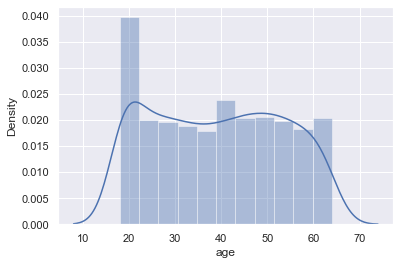

In [8]:
#Having a look at the distribution of age.
sns.distplot(raw_data['age'])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

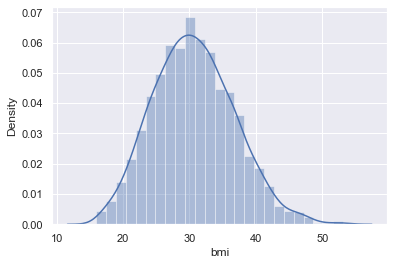

In [9]:
#Having a look at the distribution of bmi.
sns.distplot(raw_data['bmi'])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

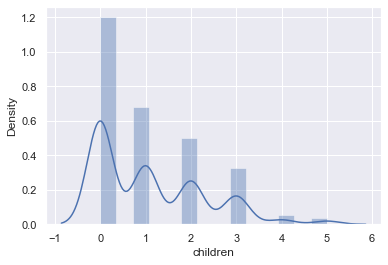

In [133]:
#Having a look at the distribution of children.
sns.distplot(raw_data['children'])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

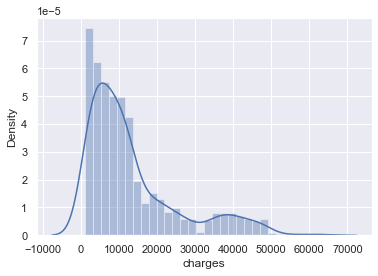

In [10]:
#Having a look at the distribution of charges.
sns.distplot(raw_data['charges'])

## Checking the OLS assumptions

In [11]:
data=raw_data.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


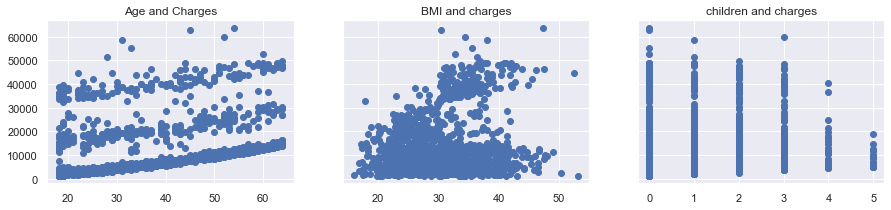

In [12]:
#Scattering data to find colinearity.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data['age'],data['charges'])
ax1.set_title('Age and Charges')
ax2.scatter(data['bmi'],data['charges'])
ax2.set_title('BMI and charges')
ax3.scatter(data['children'],data['charges'])
ax3.set_title('children and charges')


plt.show()

In [13]:
# We make sure to create a copy of the data before we start altering it.
fdata = data.copy()
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
fdata['smoker'] = fdata['smoker'].map({'yes':1, 'no':0})
fdata

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


## Create dummy variables

In [14]:
data_with_dummies = pd.get_dummies(fdata, drop_first=True)

In [19]:
data_with_dummies.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


### Rearranging a bit

In [21]:
data_with_dummies.columns.values

array(['age', 'bmi', 'children', 'smoker', 'charges', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [22]:
cols = ['charges','age', 'bmi', 'children', 'smoker', 'sex_male']

In [23]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,charges,age,bmi,children,smoker,sex_male
0,16884.92400,19,27.900,0,1,0
1,1725.55230,18,33.770,1,0,1
2,4449.46200,28,33.000,3,0,1
3,21984.47061,33,22.705,0,0,1
4,3866.85520,32,28.880,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [25]:
targets = data_preprocessed['charges']
# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['charges'],axis=1)

### Scale the data

In [26]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [27]:
# Scale the features and store them in a new variable.
inputs_scaled = scaler.transform(inputs)


### Train Test Split

In [28]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [29]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
# Let's check the outputs of the regression
# I'll store them in y_hat.
y_hat = reg.predict(x_train)


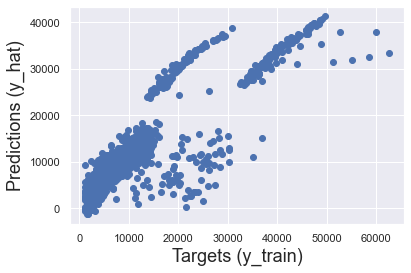

In [32]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

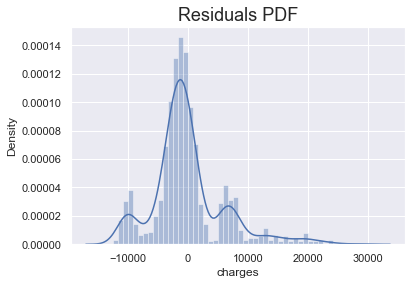

In [35]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)

### Finding the weights and bias

In [36]:
# Obtain the bias (intercept) of the regression
reg.intercept_

13314.29016589862

In [37]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([3552.17808367, 1836.84910722,  592.95468768, 9723.74207203,
         76.80822885])

In [38]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,3552.178084
1,bmi,1836.849107
2,children,592.954688
3,smoker,9723.742072
4,sex_male,76.808229


In [39]:
data_preprocessed

,charges,age,bmi,children,smoker,sex_male
0,16884.92400,19,27.900,0,1,0
1,1725.55230,18,33.770,1,0,1
2,4449.46200,28,33.000,3,0,1
3,21984.47061,33,22.705,0,0,1
4,3866.85520,32,28.880,0,0,1
...,...,...,...,...,...,...
1333,10600.54830,50,30.970,3,0,1
1334,2205.98080,18,31.920,0,0,0
1335,1629.83350,18,36.850,0,0,0
1336,2007.94500,21,25.800,0,0,0


## Testing our model

In [41]:
y_hat_test = reg.predict(x_test)

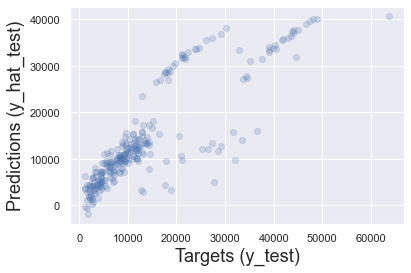

In [42]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [46]:
#List of predicted output.
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,11068.221479
1,4476.706659
2,1290.609435
3,10935.261598
4,27280.907314


In [49]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
#Reset Index for test dataset to match in our dataframe.
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = y_test
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,11068.221479,14449.85440
1,4476.706659,1981.58190
2,1290.609435,2709.11190
3,10935.261598,8334.45755
4,27280.907314,33750.29180
...,...,...
263,13545.637403,8733.22925
264,39646.054179,47496.49445
265,31957.714337,21677.28345
266,4279.153391,4185.09790


In [50]:
# We can calculate the difference between the targets and the predictions.
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [51]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,11068.221479,14449.85440,3381.632921,23.402540
1,4476.706659,1981.58190,-2495.124759,125.915803
2,1290.609435,2709.11190,1418.502465,52.360424
3,10935.261598,8334.45755,-2600.804048,31.205439
4,27280.907314,33750.29180,6469.384486,19.168381
...,...,...,...,...
263,13545.637403,8733.22925,-4812.408153,55.104567
264,39646.054179,47496.49445,7850.440271,16.528462
265,31957.714337,21677.28345,-10280.430887,47.424904
266,4279.153391,4185.09790,-94.055491,2.247390


In [52]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,268.000000,268.000000,268.000000,268.000000
mean,13531.830879,13312.818747,-219.012131,38.231133
std,10443.829237,11769.704586,6003.795212,43.424536
min,-1877.074744,1137.011000,-11363.744743,0.030274
25%,6509.503086,5234.338375,-2712.008304,14.049461
50%,10531.608415,9526.937700,-925.397883,25.176296
75%,14748.156097,15977.416237,1115.673595,52.728701
max,40646.981790,63770.428010,23123.446220,445.831540


In [53]:
# Displaying result only 2 digits after dot.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
176,13424.97,13429.04,4.07,0.03
5,9455.42,9447.25,-8.17,0.09
185,9484.05,9447.38,-36.66,0.39
103,7115.07,7147.10,32.04,0.45
261,11638.45,11743.30,104.85,0.89
...,...,...,...,...
88,4501.20,1674.63,-2826.57,168.79
180,3841.88,1261.44,-2580.44,204.56
28,-1877.07,1694.80,3571.87,210.76
230,3588.96,1137.01,-2451.95,215.65


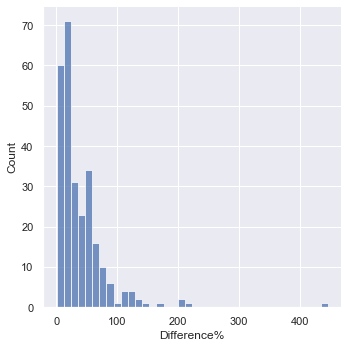

In [55]:
sns.displot(df_pf['Difference%'])

We can see our model was able to predict somewhat accurately. The inaccurate observation were due to some outliers which needed cleaning beforehand.